In [26]:
%matplotlib inline

import pandas as pd

# these will be useful later
import numpy  as np
from matplotlib import pyplot as plt

In [27]:
crime=pd.read_csv("mun.csv", index_col = "id", parse_dates = ["id"], encoding='iso-8859-1')
crime=crime.drop('SUBTIPO', axis=1)

In [28]:
hom13= crime[(crime['MODALIDAD']=='HOMICIDIOS') & (crime['TIPO'] == 'DOLOSOS' )]
hom13= hom13.groupby([hom13.index,'year','ENTIDAD', 'MUNICIPIO']).sum().reset_index()
hom13=hom13.set_index(['id'])
hom13=hom13[hom13.year == 2013]
hom13=hom13.rename(columns = {'total':'homicidios'})

In [29]:
pop=pd.read_csv("pop.csv", index_col = "id", parse_dates = ["id"], encoding='iso-8859-1')
pop=pop.drop('hom', axis=1)
pop=pop.drop('muj', axis=1)

In [39]:
tot13 = pd.concat([hom13, pop], axis=1)
tot13= tot13.drop('nom', axis=1)
tot13['hom_rate'] = (tot13['homicidios']/tot13['pop'])*100000

In [40]:
x31_13 = pd.read_csv("3x1_2013utf8.csv", index_col = "id", parse_dates = ["id"])
x31_13 = x31_13.drop('ClaveEntidad', axis=1)
x31_13 = x31_13.drop('ClaveMunicipio', axis=1)
x31_13 = x31_13.drop('ClaveLocalidad', axis=1)
x31_13 = x31_13.drop('NombreLocalidad', axis=1)
x31_13 = x31_13.drop('ID_LOC', axis=1)
x31_13 = x31_13.groupby([x31_13 .index,'year']).sum()
x31_13 = x31_13.rename(columns = {'serviciosComunitarios':'Servicios Comunitarios'})
x31_13 = x31_13.rename(columns = {'infraestructura':'Infraestructura'})
x31_13 = x31_13.rename(columns = {'proyectosProductivos':'Proyectos Productivos'})

In [41]:
tot13 = tot13.join(x31_13)

In [42]:
tot13 = tot13.rename(columns = {'suma':'Total 3x1'})
tot13 = tot13.drop('homicidios',axis=1)
tot13 = tot13.drop('pop',axis=1)
tot13 = tot13.drop('year',axis=1)


In [43]:
tot13 = tot13.reset_index()
tot13 = tot13.set_index(['id'])

In [44]:
tot13.head(10)

,year,ENTIDAD,MUNICIPIO,hom_rate,Servicios Comunitarios,Infraestructura,Proyectos Productivos,Total 3x1
id,,,,,,,,
1001,2013,AGUASCALIENTES,AGUASCALIENTES,2.383910,2,4,0,6
1002,2013,AGUASCALIENTES,ASIENTOS,10.990943,1,1,0,2
1003,2013,AGUASCALIENTES,CALVILLO,0.000000,2,11,4,17
1004,2013,AGUASCALIENTES,COSIO,0.000000,1,1,0,2
1006,2013,AGUASCALIENTES,PABELLON DE ARTEAGA,2.388801,1,0,0,1
1007,2013,AGUASCALIENTES,RINCON DE ROMOS,4.068679,1,1,0,2
1008,2013,AGUASCALIENTES,SAN JOSE DE GRACIA,0.000000,1,3,0,4
1009,2013,AGUASCALIENTES,TEPEZALA,0.000000,1,0,0,1
2001,2013,BAJA CALIFORNIA,ENSENADA,10.282468,0,0,1,1


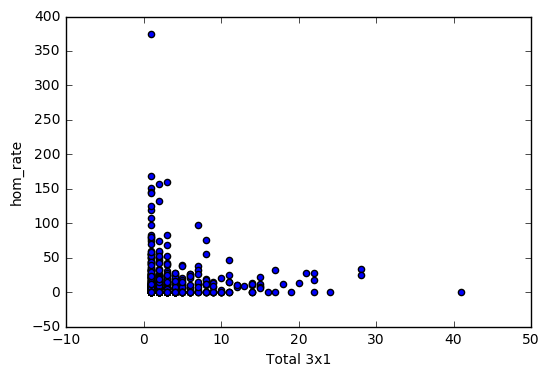

In [45]:
tot13.plot(kind = "scatter", x = "Total 3x1", y = "hom_rate")

In [46]:
tot13.to_csv('hom_3x1_13.csv')